<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.cluster import KMeans

#!pip install plotly
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

## Load and Prepare Data

In [2]:
data=pd.read_csv('Mall_Customers.csv')

## EDA

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

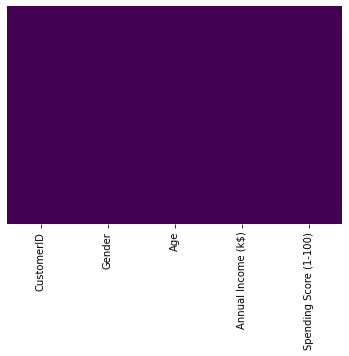

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data Preprocessing

In [7]:
data.drop('CustomerID',axis=1,inplace=True)

In [8]:
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

## Strorytelling - Visualization

In [9]:
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


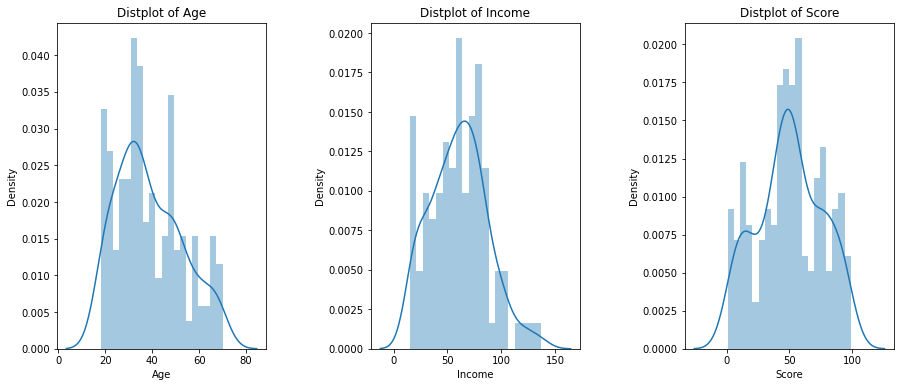

In [10]:
plt.figure(1 , figsize = (15 , 6))
n=1
for i in ['Age','Income','Score']:
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[i] , bins = 20)
    plt.title('Distplot of {}'.format(i))
    n+=1


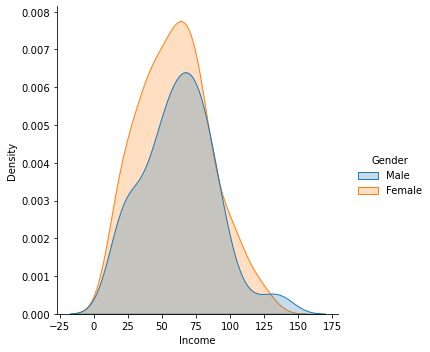

In [11]:
sns.displot(data,x='Income',kind='kde',hue='Gender',fill=True)

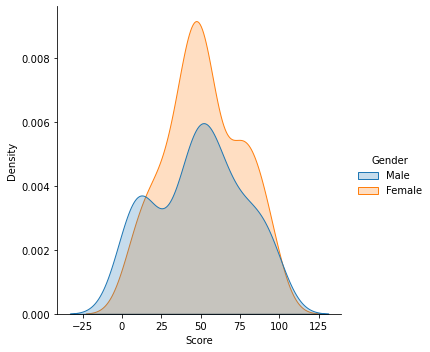

In [12]:
sns.displot(data,x='Score',kind='kde',hue='Gender',fill=True)

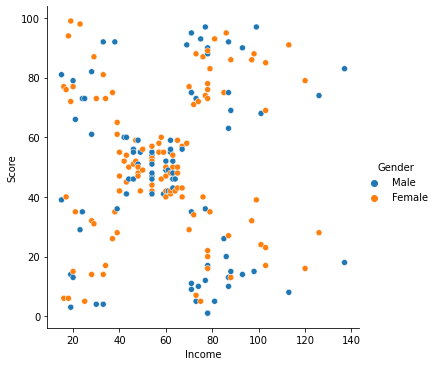

In [13]:
sns.relplot(data=data,x='Income',y='Score',hue='Gender')

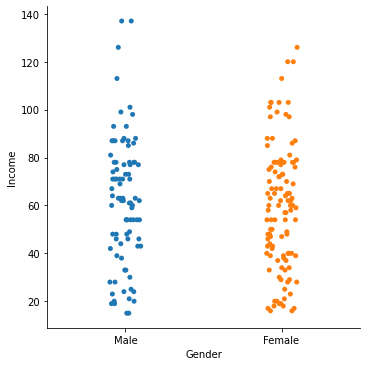

In [14]:
sns.catplot(data=data,x='Gender',y='Income')

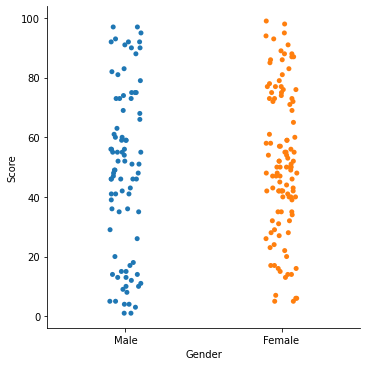

In [15]:
sns.catplot(data=data,x='Gender',y='Score')

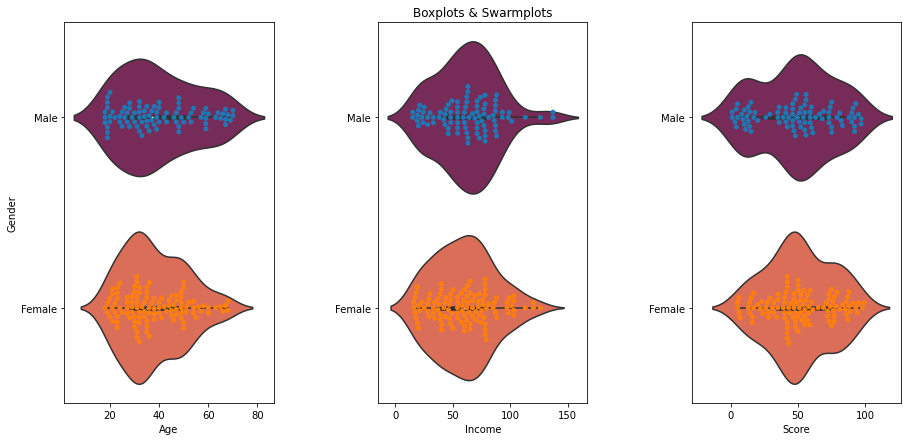

In [16]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Income' , 'Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , palette = 'rocket')
    sns.swarmplot(x = cols , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Train the Model (Clustering)

In [17]:
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
#bulding model using Annual Income and Spending Score

In [19]:
X1=data[['Income','Score']]

In [20]:
X1

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
X1=data[['Income','Score']].iloc[: , :].values


In [22]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init = 'k-means++', n_init = 10 ,random_state=26)
    
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    

Text(0, 0.5, 'Inertia')

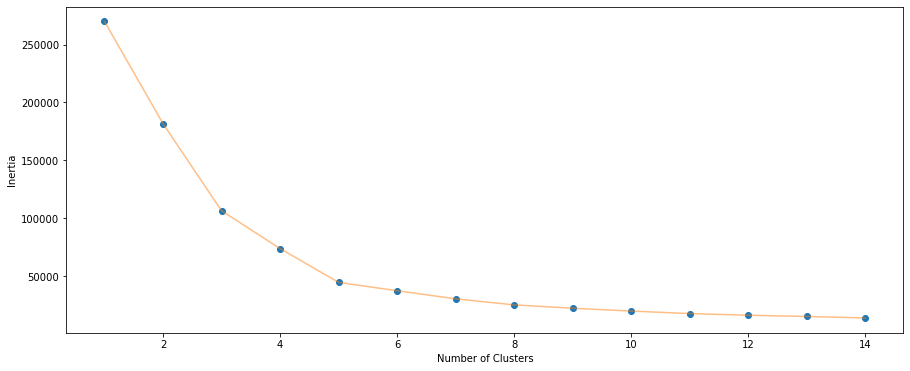

In [23]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia')

In [24]:
kmeans = KMeans(n_clusters = 5 ,init='k-means++',random_state= 111  )
kmeans.fit(X1)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

In [25]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

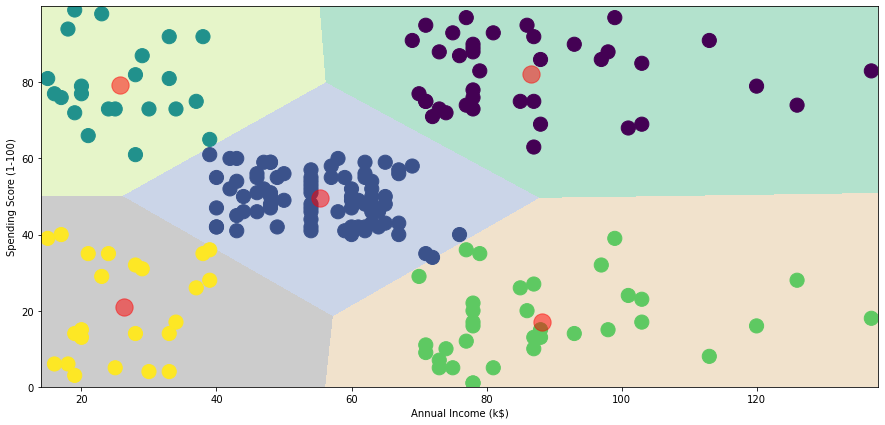

In [26]:
plt.figure(1 , figsize = (15 , 7) )

plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')


plt.scatter( x = 'Income' ,y = 'Score' , data = data , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

plt.ylabel('Spending Score (1-100)') 
plt.xlabel('Annual Income (k$)')
plt.show()

In [27]:
#Building Model using Age , Annual Income and Spending Score

In [28]:
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [29]:
X2=data[['Age','Income','Score']].values

In [30]:
wcss_2=[]
for i in range(1,15):
    kmeans_2=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans_2.fit(X2)
    wcss_2.append(kmeans_2.inertia_)

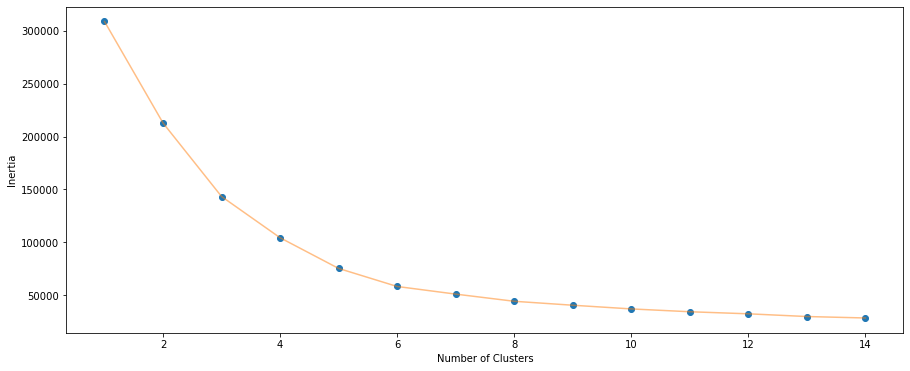

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss_2 , 'o')
plt.plot(np.arange(1 , 15) , wcss_2 , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
kmeans_2=KMeans(n_clusters=5,init = 'k-means++',random_state=42)
kmeans_2.fit(X2)
labels2 = kmeans_2.labels_
centroids2 = kmeans_2.cluster_centers_

In [34]:
data['label2'] =  labels2

trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Score'],
    z= data['Income'],
    mode='markers',
     marker=dict(
        color = data['label2'], 
        size= 20,
        line=dict(
            color= data['label2'],
            width= 12
        ),
        opacity=0.8
     )
)

data1 = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data1, layout=layout)
py.offline.iplot(fig)

## Send us the Result (Maktabkhoone)